# Seattle rainfall

A response to a query from @Yashavi Singh [Slack link](https://microsoftmlchallenge.slack.com/archives/C016T79SQRX/p1595586442212400)

Dataset can be downloaded from [Kaggle](https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
def load_data():
    df = pd.read_csv('seattleWeather_1948-2017.csv')
    df.dropna(inplace=True)
    df.drop(columns=['DATE'], inplace=True)
    df['RAIN'] = df['RAIN'].astype('int')
    return df

In [3]:
def prep_cols(data, cols, num_days):
    for col in cols:
        for i in range(num_days):
            prev_col_name = col if i == 0 else '{}-{}'.format(col,i)
            new_col_name = '{}-{}'.format(col, i+1)
            data[new_col_name] = data[prev_col_name].shift(1).fillna(0)
    return data.drop(columns=cols)

In [4]:
def build_model(data, target, model):
    y = data.pop(target)
    X = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, X_train.columns, y_test, y_pred

In [5]:
models = []
for days in range(5,15):
    df = load_data()
    df = prep_cols(df, ['PRCP','TMIN','TMAX'], num_days=days)
    models.append(build_model(df, 'RAIN', RandomForestClassifier()))

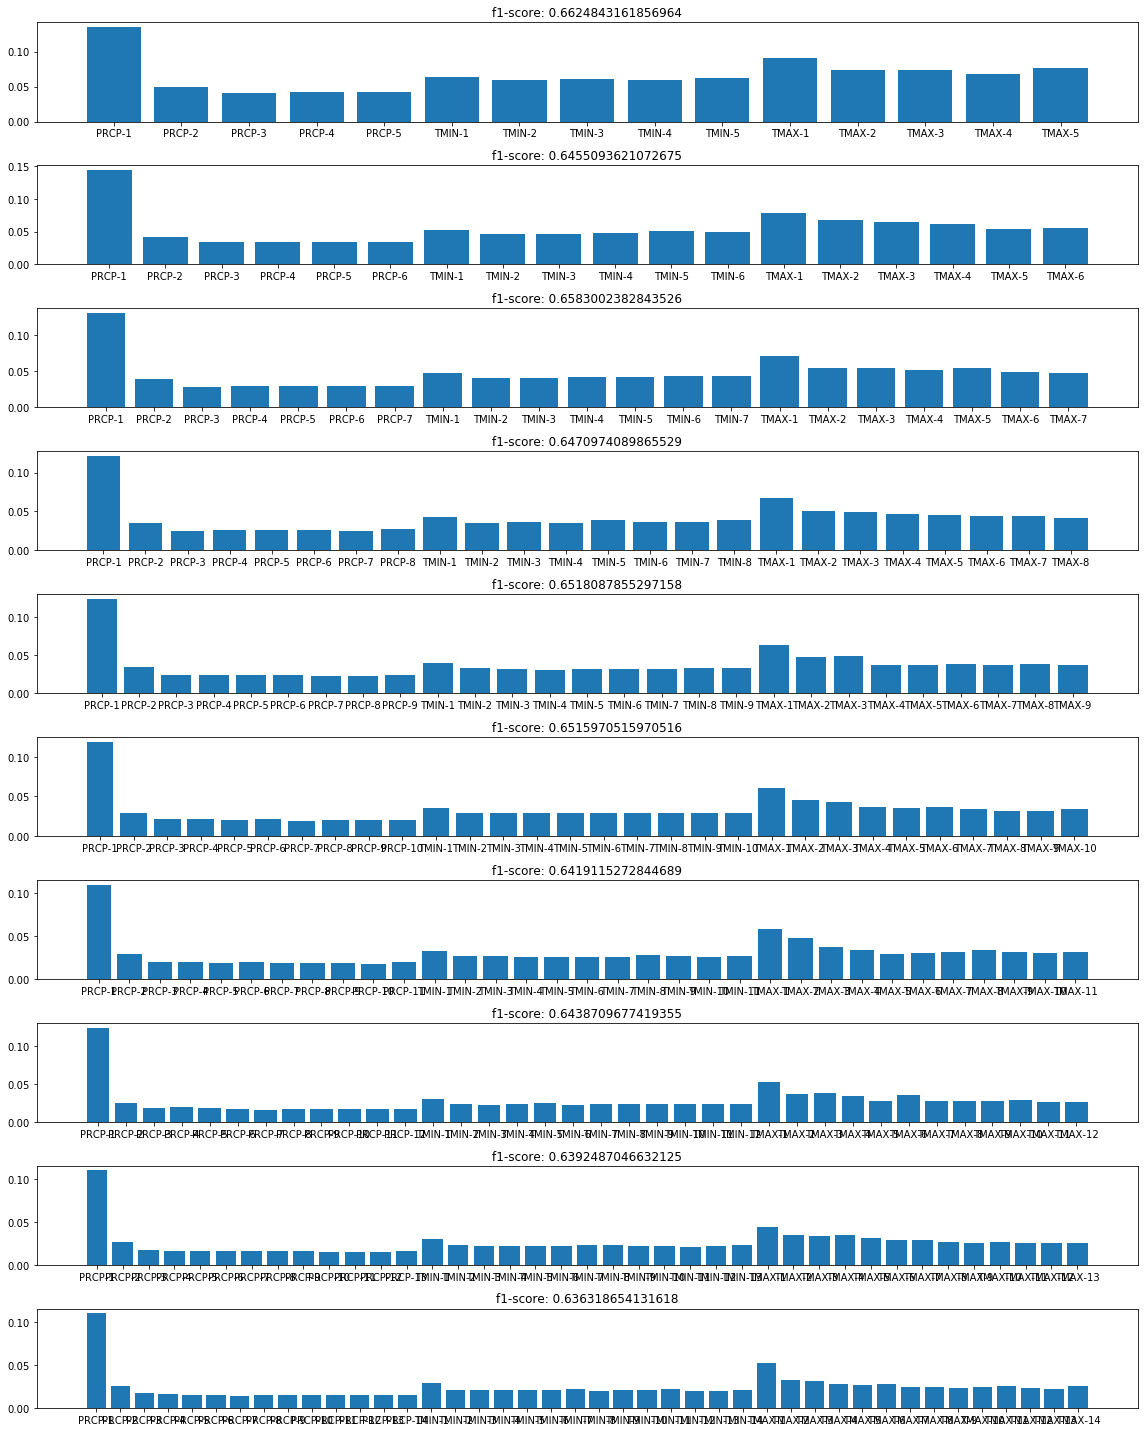

In [6]:
fig, ax = plt.subplots(nrows=10,figsize=(16,20))
for i,(model,col_names,y_test,y_pred) in enumerate(models):
    ax[i].bar(x=col_names, height=model.feature_importances_)
    ax[i].set_title(f'f1-score: {f1_score(y_test,y_pred)}')
plt.tight_layout()
plt.show()